In [43]:
import pandas as pd
import numpy as np
import sklearn2pmml as pmml
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.externals import joblib

In [3]:
iris_data = load_iris(True)
(X, y) = iris_data
df = pd.DataFrame(X)
df.columns = ['x1', 'x2', 'x3', 'x4']

In [33]:
def gen_fmap_file(features, fout):
    with open(fout, 'w+') as f:
        for i, feature in enumerate(features):
            f.write("{0}\t{1}\tq\n".format(i, feature))
fmap_file = "./pmml-models/xgboost/classifier.fmap"
gen_fmap_file(['x1', 'x2', 'x3', 'x4'], fmap_file)

In [30]:
# output xgboost model
classifier = xgboost.XGBClassifier(max_depth=6, learning_rate=0.1,
                                   n_estimators=10,
                                   silent=True, objective='"multi:softmax"')
%time classifier.fit(X, y)

CPU times: user 12.4 ms, sys: 21.8 ms, total: 34.2 ms
Wall time: 36.7 ms


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [35]:
# save model
classifier._Booster.save_model("./pmml-models/xgboost/classifier.model")
# save feature map file
classifier._Booster.dump_model("./pmml-models/xgboost/classifier.model.txt", fmap=fmap_file)

In [16]:
import ppmml
ppmml.to_pmml()

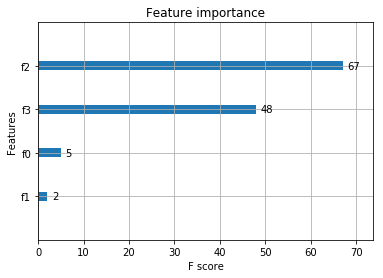

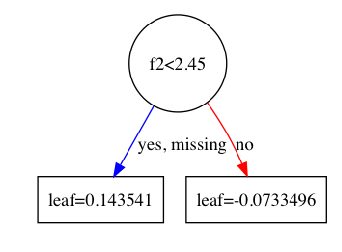

In [40]:
%matplotlib inline
classifier._Booster.get_fscore(fmap_file)
xgboost.plot_importance(classifier._Booster)
xgboost.plot_tree(classifier._Booster)